In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

C:\Users\Usuario\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


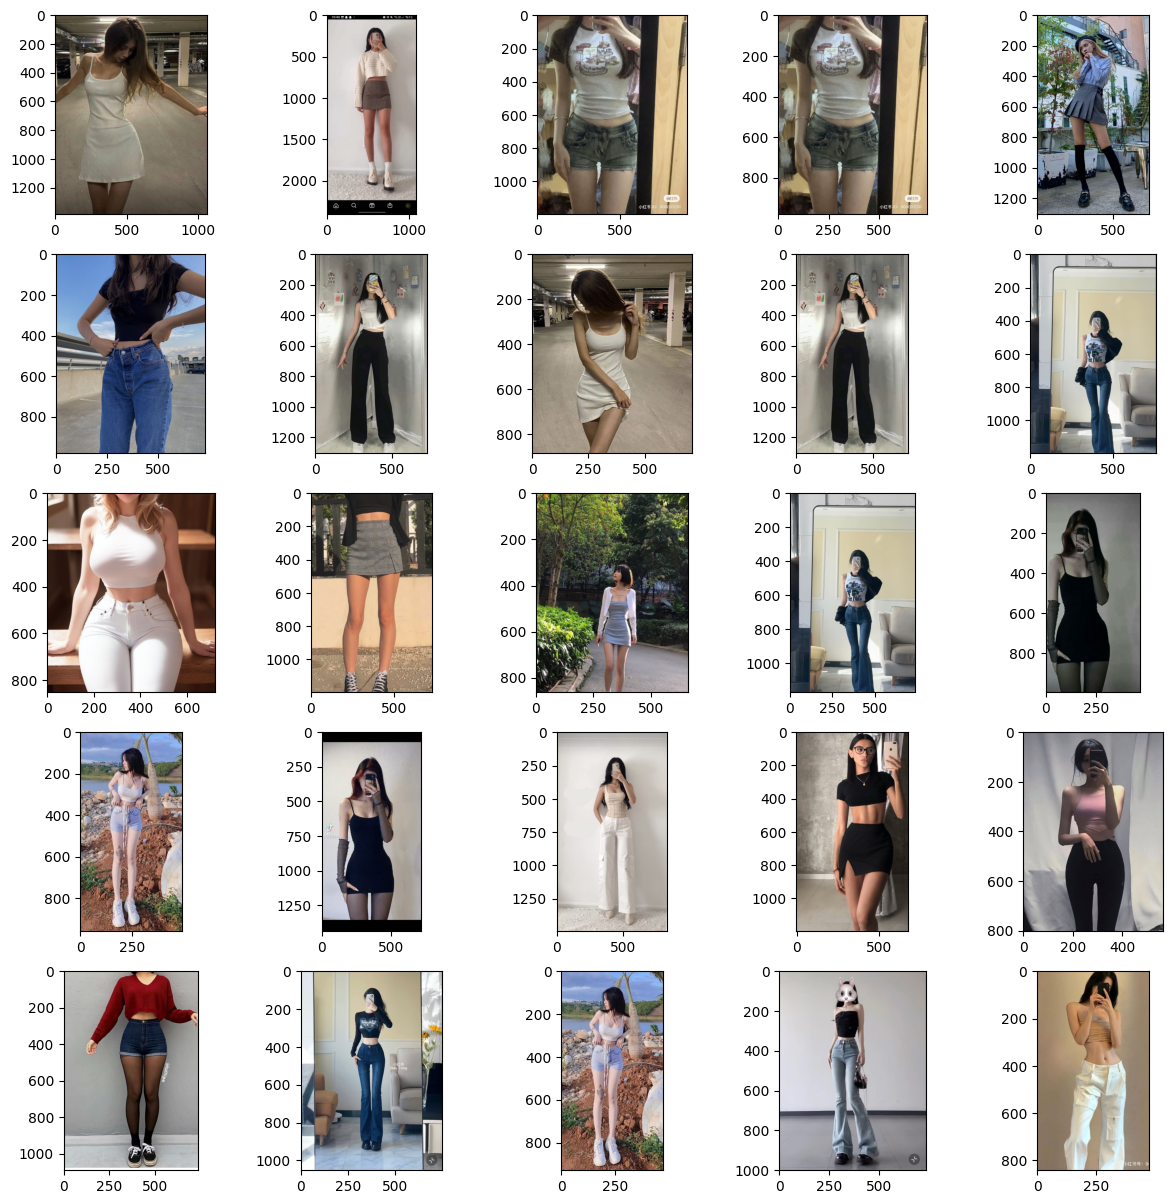

In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = './Mujeres'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen = mpimg.imread(carpeta + '/' + nombreimg)
    plt.imshow(imagen)

In [3]:
import shutil
carpeta_fuente = './Mujeres'
carpeta_destino = './dataset/Mujeres'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
    if i<90:
        shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [4]:
import shutil
carpeta_fuente = './Hombres'
carpeta_destino = './dataset/Hombres'
imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
    if i<90:
        shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

Found 144 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


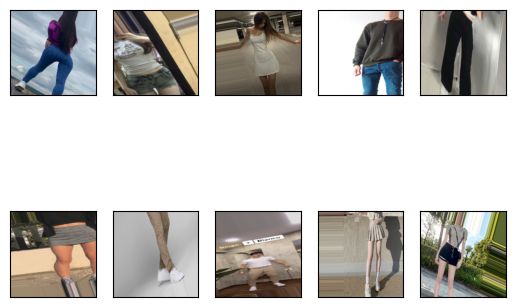

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('dataset/', target_size=(224,224),
batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('dataset/', target_size=(224,224),
batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10): 
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))
mobilenetv2.trainable = False
# Crear un modelo secuencial
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation='softmax')
])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x0000020AC4CEE110> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [4]:
import tensorflow as tf

version_fn = getattr(tf.keras, "version", None)
print("TF Version: " + tf.__version__)
print("TF Keras Version: " + version_fn())

TF Version: 2.16.1
TF Keras Version: 3.1.1
